In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from hdbscan import HDBSCAN
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

In [2]:
df = pd.read_csv('../data/kandidater_data.csv').dropna()

In [3]:
pca = PCA(n_components=2)
df[['pca1', 'pca2']] = pca.fit_transform(df[[str(i) for i in range(1, 26)]])

In [5]:
# Apply t-SNE to the selected columns
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(df[[str(i) for i in range(1, 26)]])

# Add the transformed coordinates to the existing dataframe
df['tsne1'] = X_tsne[:, 0]
df['tsne2'] = X_tsne[:, 1]

In [11]:
# clusterer = HDBSCAN(min_cluster_size=5, gen_min_span_tree=True)
clusterer = KMeans(n_clusters=14)
clusterer.fit(df[[str(i) for i in range(1, 26)]])
df['kmeans'] = clusterer.labels_

In [7]:
color_palette = sns.color_palette('Paired', 14)
cluster_colors = [color_palette[x] if x >= 0
                  else (0.5, 0.5, 0.5)
                  for x in df.cluster]

In [8]:
colormap = {'A': '#A82721', 
            'O': '#EAC73E', 
            'V': '#254264', 
            'Ø': '#E6801A', 
            'I': '#3FB2BE', 
            'Å': '#2B8738', 
            'B': '#733280', 
            'F': '#E07EA8', 
            'C': '#96B226', 
            'D': '#127B7F', 
            'K': '#8B8474', 
            'Q': '#C49414', 
            'M': '#832B93', 
            'Æ': '#2C5877'}

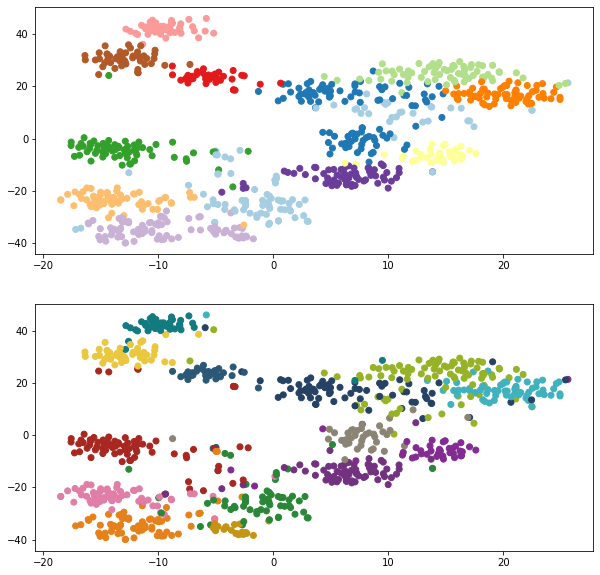

In [10]:
fig, ax = plt.subplots(2, figsize=(10,10))
ax[0].scatter(df.tsne1, df.tsne2, c=cluster_colors)
ax[1].scatter(df.tsne1, df.tsne2, c=df.CurrentPartyCode.map(colormap))

<AxesSubplot:ylabel='distance'>

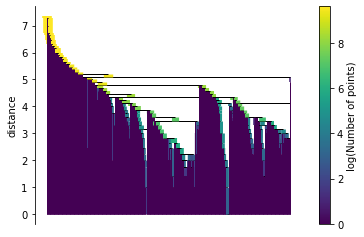

In [21]:
clusterer.single_linkage_tree_.plot(cmap='viridis', colorbar=True)

<AxesSubplot:ylabel='$\\lambda$ value'>

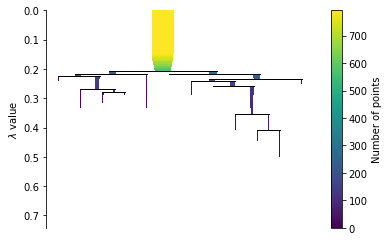

In [5]:
clusterer.condensed_tree_.plot()